# Second Assignment

The goal of this assignment is to use the iris dataset to train a classifier in asupervised fashion and a clusterer in unsupervised fashion.

**Deadline: To Be Confirmed by the Tutor**. 

**Submission:** Please email your solutions and your completed Declaration of Authorship (DoA) form to weeklyclasses@conted.ox.ac.uk 

## Setup

In [1]:
# Python ≥3.8 is required
import sys
assert sys.version_info >= (3, 8)

# Scikit-Learn ≥ 1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

## Import data and training test split

Let's import the iris dataset first.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

print('Iris Dataset Key Names')
print(iris.keys())
print()
print('Flower species names for the target dataset')
print(iris.target_names)

Iris Dataset Key Names
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Flower species names for the target dataset
['setosa' 'versicolor' 'virginica']


### Train-test splitting (3 points)

As a first step let's split the dataset into training (2/3 of the data) and test set (1/3 of the data)

In [3]:
from sklearn.model_selection import train_test_split
# Write your solution here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

#printing the shapes of the training and test dataset so I can see whether I correctly allocated 2/3 of the data to the training dataset and 1/3 to the test
print(X_train.shape, X_test.shape)
print('The amount of data that is allocated to the training set is: ', 100/150)
print('The amount of data that is allocated to the test set is: ', 50/150)

(100, 4) (50, 4)
The amount of data that is allocated to the training set is:  0.6666666666666666
The amount of data that is allocated to the test set is:  0.3333333333333333


### Feature scaling (4 points)

Then let's perform feature scaling (up to you whether you want to use standardisation or normalisation)

#### Method 1

I am using standardisation and will be exploring two methods. One is by directly using the standard scaler on the training and testing dataset and the other is by using the code that Professor Izzo used in lecture 3.1 (note: I used the second method to double-check if method 1 was correct and it tured out to be correct)

In [4]:
from sklearn.preprocessing import StandardScaler
# Write your solution here
scaler = StandardScaler() #I am creating the scalar

# I am standardisation the dataset features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# I am printing these two arrays to double-check and see if they have the same scale
X_train_scaled.min(axis=1), X_train_scaled.max(axis=1)

(array([ 0.49, -1.33, -0.82, -0.82, -1.5 , -1.42, -1.28,  0.06, -1.29,
        -1.29, -0.6 , -1.42, -1.26, -1.92, -0.6 , -0.16, -1.33, -1.33,
        -0.16, -1.05, -0.6 , -1.29, -1.29,  1.04, -1.42, -0.38, -0.6 ,
        -1.26, -1.86, -1.04, -1.42,  0.5 , -1.48, -0.16, -0.38, -1.29,
        -1.26, -1.28,  0.28, -1.39, -0.38, -1.04, -1.39,  0.06, -1.48,
        -0.16, -1.39, -0.82,  0.02,  1.3 , -1.39, -1.04, -1.74,  0.49,
        -0.38, -0.6 , -0.82, -0.6 , -1.7 ,  0.06, -0.6 , -0.6 , -0.6 ,
        -0.82, -1.22,  0.28, -0.82,  0.06, -0.16, -1.5 , -1.04, -0.16,
        -0.16, -1.29, -1.92, -1.29, -1.22,  1.15, -0.38, -1.26, -1.29,
         0.26,  0.28,  0.28, -1.28, -1.26, -0.16, -1.92, -0.21, -0.16,
        -1.33,  0.5 , -0.82,  0.28, -1.16, -1.33,  0.06, -1.33, -2.36,
        -1.5 ]),
 array([ 1.56,  0.93,  0.91,  0.26,  0.71,  2.25,  2.91,  0.98,  0.06,
         0.06,  0.72,  0.06, -0.13,  0.14,  1.17,  0.78,  2.47,  1.15,
         1.43,  1.59,  1.56,  1.37,  0.71,  2.37,  1.15,  0.

#### Method 2

I am using the code that Professor Izzo used in lecture 3.1 for standardisation and printed the minimum values for the training dataset. The array values matched the results in the first method which means that I can continue with method 1.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipline = Pipeline ([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

method_2 = num_pipline.fit_transform(X_train)
print(method_2.min(axis=1))

[ 0.49 -1.33 -0.82 -0.82 -1.5  -1.42 -1.28  0.06 -1.29 -1.29 -0.6  -1.42
 -1.26 -1.92 -0.6  -0.16 -1.33 -1.33 -0.16 -1.05 -0.6  -1.29 -1.29  1.04
 -1.42 -0.38 -0.6  -1.26 -1.86 -1.04 -1.42  0.5  -1.48 -0.16 -0.38 -1.29
 -1.26 -1.28  0.28 -1.39 -0.38 -1.04 -1.39  0.06 -1.48 -0.16 -1.39 -0.82
  0.02  1.3  -1.39 -1.04 -1.74  0.49 -0.38 -0.6  -0.82 -0.6  -1.7   0.06
 -0.6  -0.6  -0.6  -0.82 -1.22  0.28 -0.82  0.06 -0.16 -1.5  -1.04 -0.16
 -0.16 -1.29 -1.92 -1.29 -1.22  1.15 -0.38 -1.26 -1.29  0.26  0.28  0.28
 -1.28 -1.26 -0.16 -1.92 -0.21 -0.16 -1.33  0.5  -0.82  0.28 -1.16 -1.33
  0.06 -1.33 -2.36 -1.5 ]


## Part 1: Supervised training using K-Nearest Neighbourse


### Model creation (6 points) and training (2 points)

Now, evaluate the performance of your classifier using the confusion matrix. Compute and visualize the confusion matrix for our three classes

Now, let's create and train a `KNeighborsClassifier`.

We want the following properties for our classifier:
* check 7 neighbours by default for the `kneighbors` queries.
* use the Manhattan distance metric to identify neighbours
* use the Ball Tree algortihm to compute the nearest neighbours, with a `leaf_size` of 3. Check the Ball Tree algorithm documentation on scikit-learn for more details.

Check the `KNeighborsClassifier` documentation to identify the arguments to pass to the `KNeighborsClassifier` constructor.

In [7]:
# Write your code here
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=7, metric='manhattan', algorithm='ball_tree', leaf_size=3) # Creating the KNeighborsClassifier
knn_classifier.fit(X_train_scaled, y_train) # Training the KNeighborsClassifier

KNeighborsClassifier(algorithm='ball_tree', leaf_size=3, metric='manhattan',
                     n_neighbors=7)

### Evaluation on the training set (5 points)

Now, evaluate the performance of your classifier using the confusion matrix. Compute and visualize the confusion matrix for our three classes

In [8]:
from sklearn.metrics import confusion_matrix
# Write your code here
y_train_pred = knn_classifier.predict(X_train_scaled)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print("Confusion matrix (training set):\n", conf_matrix_train)

Confusion matrix (training set):
 [[34  0  0]
 [ 0 31  2]
 [ 0  1 32]]


Compute precision, recall, and F1 score for each class prediction on the training set and print out a report.

In [9]:
from sklearn.metrics import classification_report
# Write your code here
print("\nClassification report (training set):\n", classification_report(y_train, y_train_pred))


Classification report (training set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      0.94      0.95        33
           2       0.94      0.97      0.96        33

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



How does the result look like? Has anything been misclassified?

Looking at the `target_names` key from the iris dataset (I did this at the beginning) I know that:

* the label 0 is iris-setosa
* the label 1 is iris-versicolor
* the label 2 is iris-virginica

For iris-setosa, I can see that all the labels were correctly classified since in the confusion matrix all of the classifications are in the first column. Also, the precision, recall, and F1 score are all one for Iris-Setosa which means that the K-Nearest Neighbours classifier correctly categorised the Iris-Setosa species.

For iris-versicolor, I can see that in the confusion matrix there were two labels that were mis-classified as iris-virginica. This means that the classifier was not able to correctly categorize all of the iris-versicolor flowers in their correct category. This is why the f1-score is the lowest as compared to the other flower species (score of 0.95).

For iris-virginica, I can see from the confusion matrix that one label was mis-classified as Iris-Versicolor. The numbers of mis-classifications for this flower species is less than the number of mis-classifications for iris-versicolor which is why the f1 score for iris-virginica is a bit higher than the f1 score of iris-versicolor.

### Evaluation on the test set (5 points)

Now make predictions on the test set, compute the confusion matrix for the test set. how does it compare to the one of the training set?

In [10]:
# Write your code here
y_test_pred = knn_classifier.predict(X_test_scaled)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Confusion matrix (test set):\n", conf_matrix_test)

Confusion matrix (test set):
 [[16  0  0]
 [ 0 17  0]
 [ 0  3 14]]


Compute precision, recall, and F1 score for each class prediction on the test set and print out a report.

In [11]:
# Write your code here
print("\nClassification report (test set):\n", classification_report(y_test, y_test_pred))


Classification report (test set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      1.00      0.92        17
           2       1.00      0.82      0.90        17

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



At first, I thought that the results of the test set are better than the training dataset (this was when I compared the confusion matrices). But after looking at the classification report of the test set I realise that the K-Nearest Neighbours classifier did not have that much accuracy in categorising the iris-versicolor and iris-virginica species. The categorisation of iris-setosa was the same (the f1 score was 1 in the test and training set classification report)

If you look at the confusion matrix, you will see that iris-versicolor was correctly categorised and that there were no miss-categorisations of the iris-versicolor species. But you can see that when you look at the iris-virginica row that there were three labels that were incorrectly classified as iris-versicolor. 

Looking at the confusion matrix, I thought that the `knn_classifier` did a good job in categorising the labels but I was suprised to see the f1-score for iris-versicolor was lower when compared to the training dataset (the score dropped from 0.95 to 0.92). The f1-score score for iris-virginica also dropped (0.96 to 0.90) this was the biggest drop and it was due to the low recall score of 0.82.

## Part 2: Unsupervised Learning using K-Means (10 points)

Train K-means clusterers on the entire iris dataset.

Train clusters with 2 to 6 clusters and use one of the metrics discussed in week 7 to show which is the optimal number of clusters

### Inertia/Silhouette Score Graph Analysis

Looking at the graph I would say that the 3rd or 6th clusters would be the optimal cluster value. I say this because there appears to be a dratic change of 0.15 from the 2nd and 3rd cluster. The same difference of 0.15 occurs when you look at the chart difference between the 5th and 6th cluster.

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Write your code here. Add as many cells as you need.

# Training the K-means clusterers on the entire iris dataset
silhouette_scores = []  # To store silhouette scores of the models
for n_clusters in range(2, 7):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

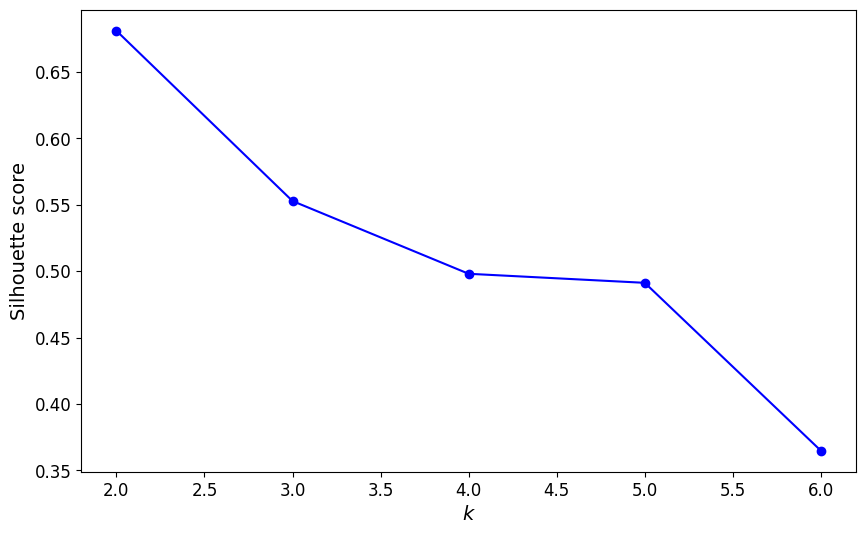

In [13]:
# Ploting the inertia/silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 7), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

That's it. Congratulations, you have completed the second assignment!